7. Śmierć pacjenta
• Estymacja niewydolności serca
• Aplikacja pokazująca lekarzowi prawdopodobieństwo zdarzenia
• https://www.kaggle.com/andrewmvd/heart-failure-clinical-data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report, f1_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
# import imblearn as imb
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
train = pd.read_csv("train_set.csv")
test = pd.read_csv("test_set.csv")

In [ ]:
df.info()

In [ ]:
df.head()

In [ ]:
df["DEATH_EVENT"].value_counts()

In [ ]:
df.shape

In [ ]:
plt.figure(figsize=(12,12))
mask = np.triu(np.ones_like(df.corr()), k=0) 
sns.heatmap(df.corr(), annot=True, mask = mask, vmin=-1., vmax=1.)
pass

In [ ]:
df.corr()["DEATH_EVENT"].sort_values(ascending=False)[1:]

In [ ]:
sns.heatmap(df.corr()[['DEATH_EVENT']].sort_values(by='DEATH_EVENT', ascending=False), annot = True)
plt.show()

In [ ]:
columns = ["serum_creatinine", "age", "high_blood_pressure", "anaemia", "creatinine_phosphokinase"]

for i in columns:
    sns.boxplot(df[i])
    plt.title(i)
    plt.show()

In [ ]:
# Train test split został wykonany przez Błażeja, który udostępnił nam dane abyśmy mogli pracować na takich samych zbiorach

In [3]:
X_train, y_train = train.drop(columns="DEATH_EVENT"), train["DEATH_EVENT"]
X_test, y_test = test.drop(columns="DEATH_EVENT"), test["DEATH_EVENT"]

In [4]:
dtc = DecisionTreeClassifier().fit(X_train, y_train)
y_pred = dtc.predict(X_train)
y_pred2 = dtc.predict(X_test)

print("Confusion matrix: ","\n", confusion_matrix(y_train, y_pred),"\n")
print("Classification matrix: ","\n", classification_report(y_train, y_pred))
print("Confusion matrix: ","\n", confusion_matrix(y_test, y_pred2),"\n")
print("Classification matrix: ","\n", classification_report(y_test, y_pred2))

Confusion matrix:  
 [[162   0]
 [  0  77]] 

Classification matrix:  
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       162
           1       1.00      1.00      1.00        77

    accuracy                           1.00       239
   macro avg       1.00      1.00      1.00       239
weighted avg       1.00      1.00      1.00       239

Confusion matrix:  
 [[38  3]
 [ 5 14]] 

Classification matrix:  
               precision    recall  f1-score   support

           0       0.88      0.93      0.90        41
           1       0.82      0.74      0.78        19

    accuracy                           0.87        60
   macro avg       0.85      0.83      0.84        60
weighted avg       0.86      0.87      0.86        60



In [7]:
dtc.feature_importances_

array([0.01493743, 0.02969777, 0.10913857, 0.01459798, 0.06872939,
       0.        , 0.07679908, 0.08542588, 0.06775645, 0.01596654,
       0.        , 0.5169509 ])

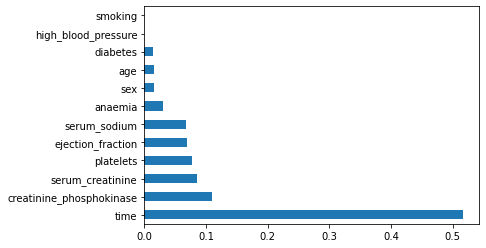

In [11]:
feat_importances = pd.Series(dtc.feature_importances_, index=X_test.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

In [16]:
train.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,60,0,35,0,228000.00,1.2,135,1,1,90,0
1,58.0,0,144,1,38,1,327000.00,0.7,142,0,0,83,0
2,53.0,1,446,0,60,1,263358.03,1.0,139,1,0,215,0
3,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
4,45.0,1,981,0,30,0,136000.00,1.1,137,1,0,11,1


In [17]:
train.iloc[:,[11, 2, 7, 6, 4, 8]]

,time,creatinine_phosphokinase,serum_creatinine,platelets,ejection_fraction,serum_sodium
0,90,60,1.20,228000.00,35,135
1,83,144,0.70,327000.00,38,142
2,215,446,1.00,263358.03,60,139
3,7,146,1.30,162000.00,20,129
4,11,981,1.10,136000.00,30,137
...,...,...,...,...,...,...
234,90,369,1.60,252000.00,25,136
235,28,249,1.00,319000.00,35,128
236,26,70,1.20,200000.00,30,132
237,120,335,0.80,235000.00,35,136


In [ ]:
params_grid = {"max_depth": [3,5,7,10, None],
              "max_features": list(range(1,14)),
              "min_samples_leaf": [1, 3, 5]
              
}

In [ ]:
grid_search = GridSearchCV(dtc, param_grid=params_grid, cv=5, verbose=0)
grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_params_

In [ ]:
dtc_params = DecisionTreeClassifier(max_depth=5, class_weight="balanced", max_features=8, min_samples_leaf=5).fit(X_train, y_train)
y_predCV = dtc_params.predict(X_train)
y_predCV2 = dtc_params.predict(X_test)

print("Confusion matrix: ","\n", confusion_matrix(y_train, y_predCV))
print("Classification matrix: ","\n", classification_report(y_train, y_predCV))
print("Confusion matrix: ","\n", confusion_matrix(y_test, y_predCV2))
print("Classification matrix: ","\n", classification_report(y_test, y_predCV2))

In [ ]:
# undersample = imb.under_sampling.RandomUnderSampler()
# X_test2, y_test2 = undersample.fit_resample(X,y)

Random Forrest Classifier z domyślnymi parametrami
Sprawdzenie modelu na danych treningowych oraz testowych

In [ ]:
rdc = RandomForestClassifier().fit(X_train, y_train)
y_predRDC = rdc.predict(X_train)
y_predRDC2 = rdc.predict(X_test)

print("Confusion matrix: ","\n", confusion_matrix(y_train, y_predRDC))
print("Classification matrix: ","\n", classification_report(y_train, y_predRDC))
print("Confusion matrix: ","\n", confusion_matrix(y_test, y_predRDC2))
print("Classification matrix: ","\n", classification_report(y_test, y_predRDC2))

In [ ]:
param_random = {"max_depth": [3, 5, 7, None],
                "n_estimators": [100, 200, 500],
                "max_features": list(range(1, 14)),
                "min_samples_leaf": [1,3,5] 
}

In [ ]:
random_search = RandomizedSearchCV(rdc,
                                   param_distributions=param_random,
                                   cv=5,
                                   n_iter=10,
                                   verbose=1, 
                                   scoring='f1_macro',
                                   random_state=42)

In [ ]:
random_search.fit(X_train, y_train)

In [ ]:
random_search.best_params_

In [ ]:
rdc_2 = RandomForestClassifier(n_estimators=500, min_samples_leaf=3, max_features=9, max_depth=None).fit(X_train, y_train)

In [ ]:
y_predRDC_CV = rdc_2.predict(X_train)
y_predRDC_CV2 = rdc_2.predict(X_test)


print("Confusion matrix: ","\n", confusion_matrix(y_train, y_predRDC_CV))
print("Classification matrix: ","\n", classification_report(y_train, y_predRDC_CV))
print("Confusion matrix: ","\n", confusion_matrix(y_test, y_predRDC_CV2))
print("Classification matrix: ","\n", classification_report(y_test, y_predRDC_CV2))

Test modelu po wybraniu najlepszych zmiennych

In [ ]:
X = train.drop(columns="DEATH_EVENT", axis=1)
y = train["DEATH_EVENT"]

In [ ]:
model = RandomForestClassifier()
model.fit(X,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

In [ ]:
X_train2, X_test2 = train.iloc[:,[0,4,7,11]], test.iloc[:, [0,4,7,11]]

In [ ]:
train.iloc[:,[0,4,7,11]].columns

In [ ]:
sc=StandardScaler()
X_train2 = sc.fit_transform(X_train2)
X_test2 = sc.fit_transform(X_test2)

In [ ]:
param_grid2 = {
    "n_estimators": [100, 500, 1000],
    "max_features": [0.5,1,'auto'],
    "max_depth": [1,2,3,4,None],
    "min_samples_split": [2,5,8]
}

clf = RandomForestClassifier()
grid = GridSearchCV(clf, param_grid2, n_jobs=-1, verbose=2, cv=10)
grid.fit(X_train2, y_train)
grid.best_params_

In [ ]:
clf = RandomForestClassifier(
    n_estimators=500,
    max_features="auto",
    max_depth=2,
    min_samples_split=8,
    random_state=0)

In [ ]:
clf.fit(X_train2, y_train)
y_prediction = clf.predict(X_train2)
y_prediction2 = clf.predict(X_test2)

print("Confusion matrix: ","\n", confusion_matrix(y_train, y_prediction))
print("Classification matrix: ","\n", classification_report(y_train, y_prediction))

print("Confusion matrix: ","\n", confusion_matrix(y_test, y_prediction2))
print("Classification matrix: ","\n", classification_report(y_test, y_prediction2))

In [ ]:
# Reporting
# I evaluated the results I found with Confusion Matrix, the results are as follows:

# Correctly predicted -> %95.00 (282 of 297 predict are correct)

# True Negative -> %68.33 (41 people) -> Those who were predicted not to die and who did not die
# True Positive -> %26.67 (16 people) -> Those who were predicted to die and who did die
# Wrong predicted-> %10.98 (15 of 297 predict are wrong)

# False Positive -> %3.33 (2 people) -> Those who were predicted to die but who did not die
# False Negative -> %01.67 (1 people) -> Those who were predicted to not die but who did die